Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_splitain_test_split

C:\Users\Peanut\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Peanut\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

C:\Users\Peanut\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [3]:
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

In [6]:
data = pd.read_csv(dataset_url, sep=';')

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
data.shape

(1599, 12)

In [41]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


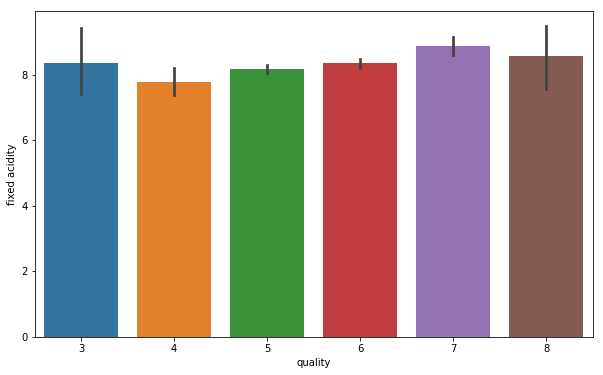

In [48]:
plt.figure(figsize= (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data=data)

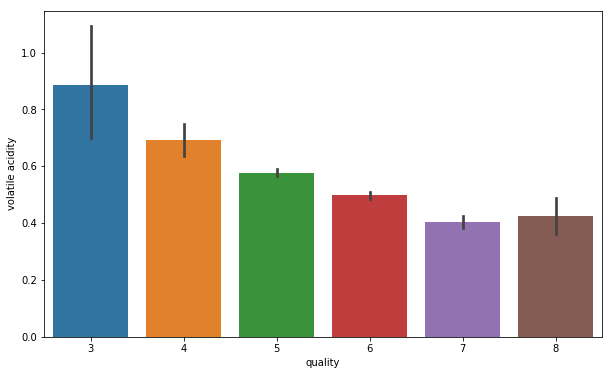

In [46]:
plt.figure(figsize= (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data=data)

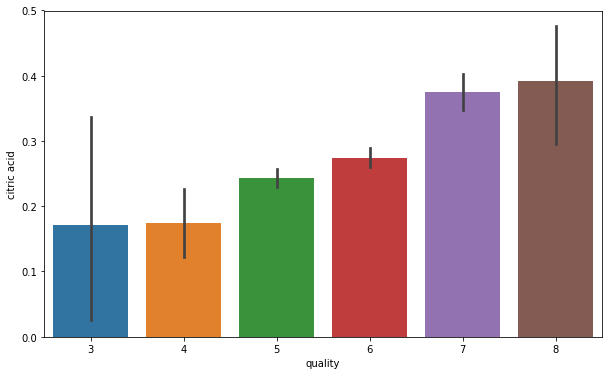

In [47]:
plt.figure(figsize= (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data=data)

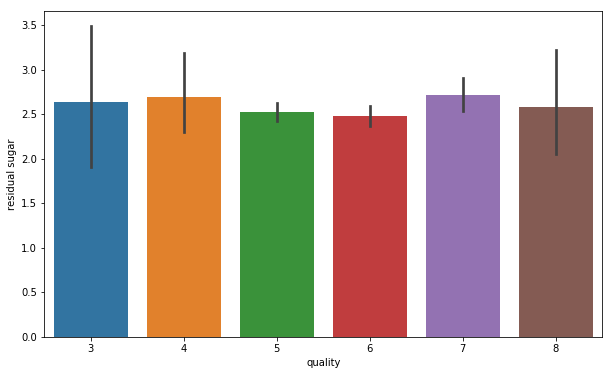

In [49]:
plt.figure(figsize= (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data=data)

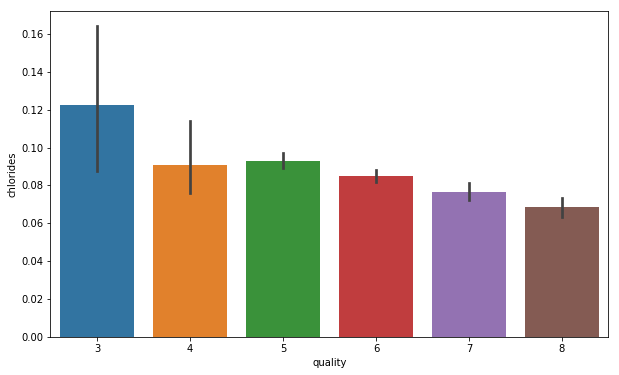

In [50]:
plt.figure(figsize= (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data=data)

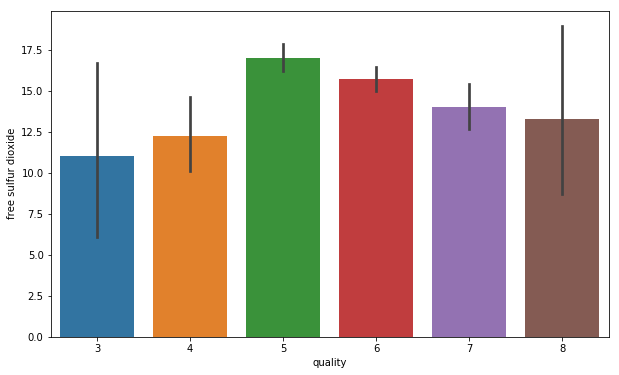

In [52]:
plt.figure(figsize= (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data=data)

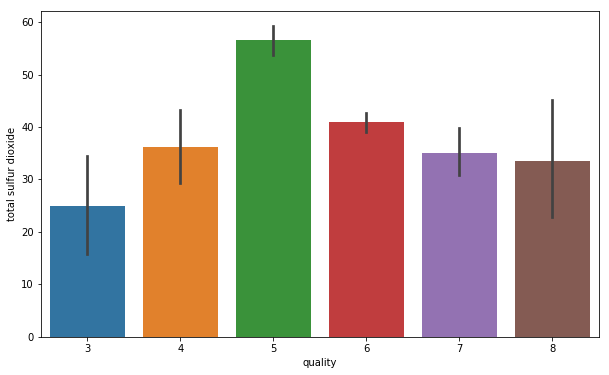

In [53]:
plt.figure(figsize= (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data=data)

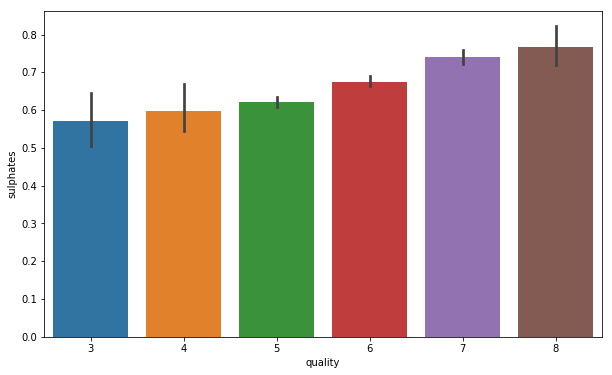

In [54]:
plt.figure(figsize= (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data=data)

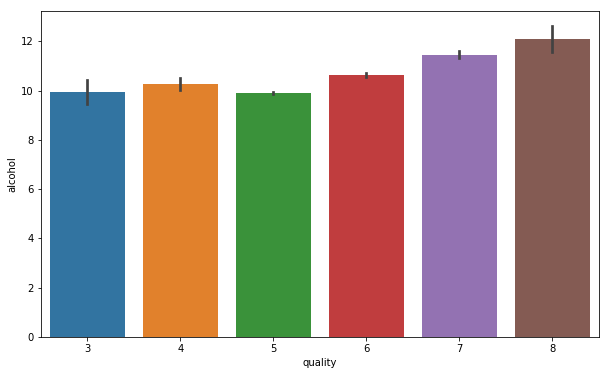

In [55]:
plt.figure(figsize= (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data=data)

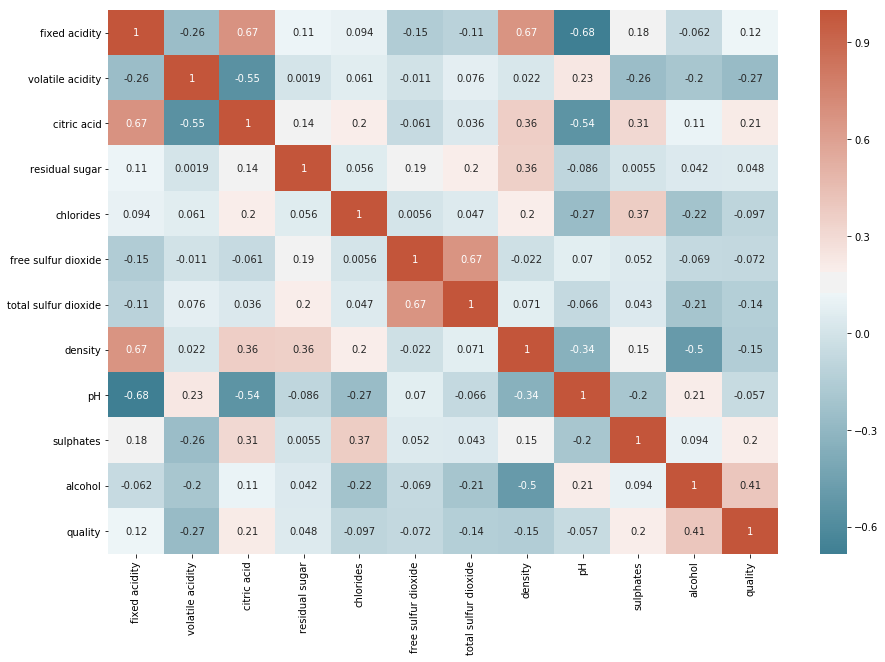

In [97]:
#plt.figure(figsize= (15,10))
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [58]:
#making binary classification for the response variable
#dividing wine as good and bad by giving the limit for the quality

bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [59]:
#assign a labels to quality varibale

label_quality = LabelEncoder()

In [60]:
#bad becomes 0 and good becomes 1

data['quality'] = label_quality.fit_transform(data['quality'])

In [61]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

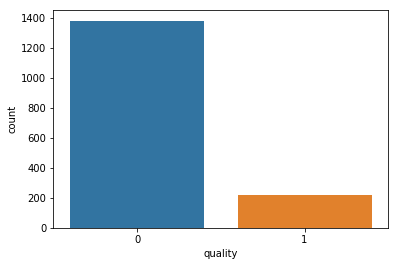

In [62]:
sns.countplot(data['quality'])

In [63]:
#seperate the dataset as response variable and feature variables

y = data.quality
X = data.drop('quality', axis=1)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42, stratify=y)

In [65]:
scaler = StandardScaler()

In [66]:
#scaling the data

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [67]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [68]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       277
           1       0.86      0.56      0.68        43

   micro avg       0.93      0.93      0.93       320
   macro avg       0.90      0.77      0.82       320
weighted avg       0.92      0.93      0.92       320



In [69]:
print(confusion_matrix(y_test, pred_rfc))

[[273   4]
 [ 19  24]]


In [70]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

C:\Users\Peanut\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [71]:
print(classification_report(y_test,pred_sgd))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       277
           1       0.41      0.56      0.47        43

   micro avg       0.83      0.83      0.83       320
   macro avg       0.67      0.72      0.69       320
weighted avg       0.86      0.83      0.84       320



In [72]:
print(confusion_matrix(y_test, pred_sgd))

[[242  35]
 [ 19  24]]


In [73]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [74]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       277
           1       0.84      0.37      0.52        43

   micro avg       0.91      0.91      0.91       320
   macro avg       0.88      0.68      0.73       320
weighted avg       0.90      0.91      0.89       320



In [80]:
#finding best parameters for SVC model

param = {
    'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [81]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [82]:
#best parameters for SVC model

grid_svc.best_params_

{'C': 1.4, 'gamma': 1, 'kernel': 'rbf'}

In [83]:
#run SVC again with best parameters

svc2 = SVC(C=1.4, gamma=1, kernel='rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       277
           1       0.91      0.47      0.62        43

   micro avg       0.92      0.92      0.92       320
   macro avg       0.92      0.73      0.79       320
weighted avg       0.92      0.92      0.91       320



In [84]:
rfc_eval = cross_val_score(estimator=rfc, X= X_train, y= y_train, cv=10)
rfc_eval.mean()

0.9030587155893304

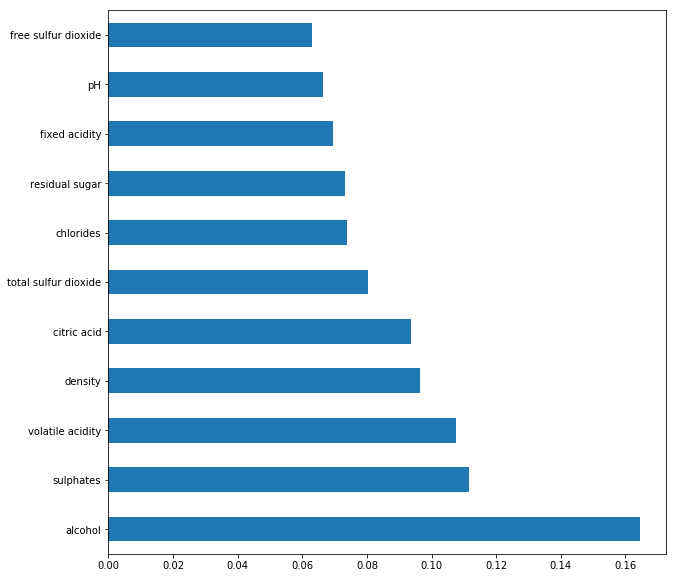

In [99]:
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [101]:
df_temp = data[data['quality']==1]
df_temp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,1.0


In [103]:
df_temp2 = data[data['quality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,0.0


In [23]:
print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))

[ 1.16664562e-16 -3.05550043e-17 -8.47206937e-17 -2.22218213e-17
  2.22218213e-17 -6.38877362e-17 -4.16659149e-18 -2.54439854e-15
 -8.70817622e-16 -4.08325966e-16 -1.17220107e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [25]:
X_test_scaled = scaler.transform(X_test)

In [27]:
print(X_test_scaled.mean(axis=0))
print(X_test_scaled.std(axis=0))

[ 0.02776704  0.02592492 -0.03078587 -0.03137977 -0.00471876 -0.04413827
 -0.02414174 -0.00293273 -0.00467444 -0.10894663  0.01043391]
[1.02160495 1.00135689 0.97456598 0.91099054 0.86716698 0.94193125
 1.03673213 1.03145119 0.95734849 0.83829505 1.0286218 ]


In [29]:
pipeline = make_pipeline(preprocessing.StandardScaler(),
                        RandomForestRegressor(n_estimators=100))

In [30]:
print(pipeline.get_params())

{'memory': None, 'steps': [('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))], 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'randomforestregressor': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_star

In [31]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth' : [None, 5, 3, 1]}

In [32]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

#fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...ors=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'], 'randomforestregressor__max_depth': [None, 5, 3, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
print(clf.best_params_)

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'sqrt'}


In [34]:
print(clf.refit)

True


In [35]:
y_pred = clf.predict(X_test)

In [37]:
print(r2_score(y_test, y_pred))

print(mean_squared_error(y_test, y_pred))

0.4610889279012047
0.347745


In [38]:
joblib.dump(clf, 'rf_regressor.pkl')

['rf_regressor.pkl']

In [39]:
clf2 = joblib.load('rf_regressor.pkl')

In [40]:
#predict data set using loaded model
clf2.predict(X_test)

array([6.45, 5.81, 4.91, 5.47, 6.24, 5.51, 4.95, 4.7 , 5.01, 6.04, 5.27,
       5.65, 5.78, 5.16, 5.78, 5.62, 6.47, 5.7 , 5.77, 6.97, 5.55, 5.62,
       5.07, 5.97, 5.92, 5.03, 5.39, 5.21, 5.94, 5.96, 5.89, 6.31, 6.02,
       5.04, 4.94, 5.99, 5.04, 6.12, 5.1 , 6.12, 5.01, 5.96, 6.63, 5.08,
       6.2 , 5.41, 5.47, 5.51, 5.04, 6.45, 5.9 , 5.22, 5.84, 5.15, 5.58,
       5.73, 5.39, 5.26, 5.  , 5.25, 5.28, 5.12, 5.12, 5.84, 5.99, 5.2 ,
       6.33, 5.  , 5.18, 6.58, 5.72, 5.49, 5.13, 5.02, 5.23, 6.01, 5.31,
       5.06, 5.33, 5.37, 6.26, 5.62, 6.09, 6.3 , 5.08, 6.12, 6.31, 6.33,
       5.76, 5.85, 5.93, 5.3 , 6.42, 5.66, 5.65, 5.74, 6.66, 6.72, 5.51,
       6.85, 5.2 , 5.39, 5.08, 6.39, 4.99, 4.78, 5.77, 4.97, 5.64, 5.92,
       5.78, 5.57, 6.06, 5.36, 5.18, 5.18, 5.99, 5.1 , 5.12, 5.93, 5.88,
       5.13, 5.78, 6.2 , 5.37, 5.43, 5.21, 5.88, 5.55, 5.44, 5.85, 6.22,
       5.13, 5.36, 5.09, 6.27, 5.02, 5.15, 6.74, 5.52, 5.2 , 5.08, 5.61,
       6.09, 5.36, 5.35, 5.12, 6.31, 5.78, 5.18, 5.